# Simulation 01

# Built-in R functions - Inverse cdf method

# Josep Fortiana  2023-02-27

# 1. Uniform random numbers in `R`

Strictly speaking, the correct term should be random sequences of numbers _(RSN),_ rather than the more usual (sequences of) random numbers. We are focusing on properties of the sequences themselves rather than of their images as sets of numbers. For instance, the sequence:

\begin{equation}
    1,2,3,4,5,\dots,1000,
\end{equation}

clearly is not random in the sense we intend to define. It is, however, uniformly spread on the set of integers between 1 and 1000. After this disclaimer, we will always use the less formal and common term _random numbers._

Randomness depends on _"unpredictability"_ in the following precise sense: there are downloadable files of random numbers. In such sequences, a given term, the hundredth, say, is known. It is not easy, however, to predict a given term from the preceding ones. Some authors use the term *pseudo-random numbers (or sequences)*, to tell sequences generated by means of an algorithm from those obtained as a fortuitous output of some natural or artificial chaotic system. The second, strict type of random numbers, can possibly be needed for cryptographic applications but for Bayesian computations and, more generally, for statistical simulations we can safely use pseudo-random numbers, assuming they have a modicum of decent properties. In these notes we use the terms *random numbers,* or *random sequences of numbers* (rather than pseudo-random) for sequences having passed a given set of randomness tests, ignoring their deterministic condition.

For scientific application purposes, in particular simulations for Monte Carlo statistical computations, including *Markov Chain Monte Carlo MCMC)* Bayesian computations, and *bootstrap* estimations, as well as engineering simulations, what is needed is not strict randomness but, instead, *reproductibility* of results. Hence it is advisable to register the specific algorithm and *seed(s)* (see below) used for generating the sequence, in case a repetition is required.

Nonetheless, should it be needed, the `random` R package returns random numbers in the strictest sense described above, by connecting with the web page [random.org](http://www.random.org/), belonging to a company commercializing this type of strictly random numbers. This page contains a a lot of information about randomness and related concepts.

## Linear congruential random numbers fall mainly on planes

The simplest kind of generators is the _linear congruential_ generators. The algorithm gives a sequence of integers of the form:

$$
	x_{n} = A\,x_{n-1}\mskip25mu (\mskip-14mu\mod B)
$$

where $A, B$ are integers. The underlying principle is based on divisibility properties	of positive integers. Chapter 3 in _The Art of Computer Programming_ by [Donald Knuth](http://www-cs-faculty.stanford.edu/~uno/) features the theorems	on which these algorithms are based, plus much context information. See also [Aaron Schlegel, _Linear Congruential Generator in R_. R-bloggers](https://www.r-bloggers.com/linear-congruential-generator-in-r/)

The most *infamous* specimen of this family of generators, used to be distributed as firmware with all *mainframe* IBM computers sold in the 1960’s and 1970’s years, is (was) called `RANDU.` 

Its notoriousness and fall into disgrace originated in a 1968 paper by George Marsaglia, *Random Numbers Fall Mainly on the Planes* (a pun with the children song [The rain in Spain,](http://www.youtube.com/watch?v=uVmU3iANbgk) in the musical film *My Fair Lady*).

In his paper, Marsaglia shows the appalling regularity exhibited by the presumed random output of `RANDU`, especially distressing if one remembers that simulations based on these numbers were used in the design of all sorts of systems, from plane wing cross-sections to nuclear plants, still in use to this day.

The following piece of code exhibits a version of `RANDU` together with code to demonstrate its suboptimal performance.

It seems the following animation doesn't work properly within Jupyter; better copy/paste  and run it in the R console.

In [1]:
seed <- as.double(1)
RANDU <- function() {
    seed <<- ((2^16 + 3) * seed) %% (2^31)
    seed/(2^31)
    }
N<-3000
X<-matrix(rep(0,3*N),N)
for(i in 1:N) {
    U <- c(RANDU(), RANDU(), RANDU(), RANDU(), RANDU())
    X[i,]<-round(U[1:3],6)
    }

#install.packages("rgl",dependencies=TRUE,repos="https://cloud.r-project.org/")
#require(rgl)
#points3d(X[,1],X[,2],X[,3])

Another version, with just static plots, due to [C.S. Gillespie](https://gist.github.com/csgillespie), is sufficient to make the point.

In [2]:
N = 1000
randu = matrix(0, ncol=3, nrow=N)
##Simulate from the randu random number generator
new_z = 1
for(i in 1:N) {
  new_x = (65539*new_z) %% 2^31
  new_y = (65539*new_x) %% 2^31
  new_z = (65539*new_y) %% 2^31
  randu[i,] = c(x=new_x/2^31, y=new_y/2^31, 
                   z=new_z/2^31)
}

In [3]:
##Simulate from the built-in RNG in R
g = matrix(0, ncol=3, nrow=N)
for(i in 1:N) {
  new_x = runif(1)
  new_y = runif(1)
  new_z = runif(1)
  g[i,] = c(x_g=new_x, y_g=new_y, z_g=new_z)
}

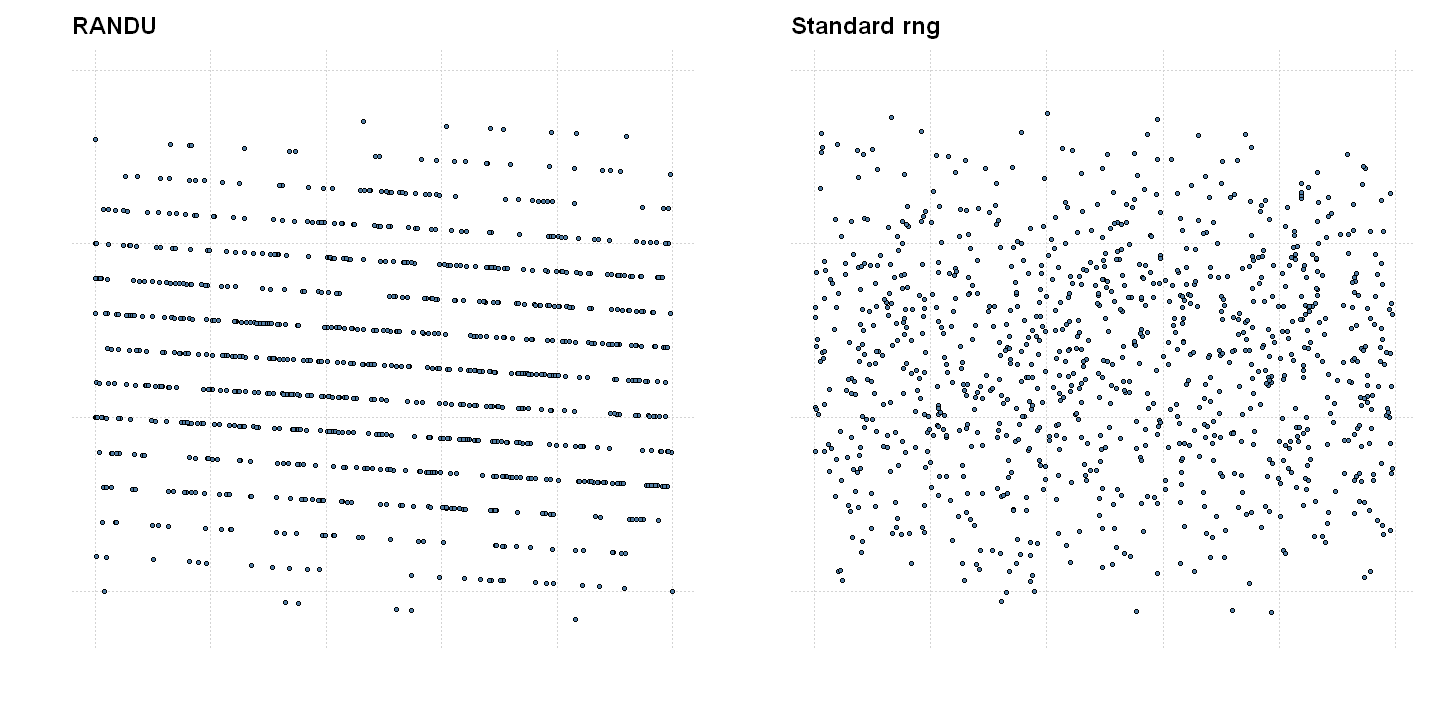

In [4]:
options(repr.plot.width=12,repr.plot.height=6)
##Plot the results
op = par(mfrow=c(1, 2), mar=c(3,3,2,1), 
    mgp=c(2,0.4,0), tck=-.01,
    cex.axis=0.9, las=1)
plot(randu[,3], 9*randu[,1] - 6*randu[,2], ylim=c(-6, 10),
     xlab="", ylab="", cex=0.5,panel.first=grid(), pch=21, bg="#5582A9",
     frame=FALSE, axes=FALSE, lwd=0.5)
title("RANDU", adj=0, cex.main=1.2, font.main=2, col.main="black")

plot(g[,3], 9*g[,1] - 6*g[,2], ylim=c(-6, 10),
     xlab="", ylab="", cex=0.5,panel.first=grid(), pch=21, bg="#5582A9",
     frame=FALSE, axes=FALSE, lwd=0.5)
title("Standard rng", adj=0, cex.main=1.2, font.main=2, col.main="black")
par(op)

The uniform random numbers generators in the base package in R are
documented in the help page that you can display typing:

In [ ]:
#? Random

There you can find several (currently 8) different possible generators which can be chosen with the `RNGkind()` function. Additionally, it is possible to insert a user-supplied generator.

By default R and Python use *Mersenne twister*, described in the paper: Matsumoto, M. and Nishimura, T. (1998) *Mersenne Twister: A 623-dimensionally equidistributed uniform pseudorandom number generator*, ACM Transactions on Modeling and Computer Simulation **8**,3-30.
This whole issue in the journal was devoted to uniform random numbers generators: ACM Transactions on Modeling and Computer Simulation (TOMACS) - Special issue on uniform random number generation - Volume 8 Issue 1, Jan. 1998.

Googleing "Mersenne twister" you will find many implementations of this generator and variants thereof in many programming languages. 

### Reproducible results: `set.seed()`

In order to obtain reproducible results, we can fix the _seed,_ an integer number, arbitrarily chosen. In this way, each run of the simulation will give the same results.

In [5]:
set.seed(1)

# 2. Pre-programmed distributions in `R`

Most often-used distributions, pre-programmed as functions in the `stats` R package, also have their pre-programmed random number generators.
Each of the probability distributions listed in Table A	has 4 functions whose names are formed from the suffix in the table, with different prefixes.If `X` is the suffix, the names of the functions are as follows (See Table B)

## Table A: Probability distributions

| Distribution        | Suffix    | Additional parameters |
|:--------------------|:----------|------------------------|
|  beta               | `beta`    |  `shape1, shape2, ncp`|
|  binomial           | `binom`   |  `size, prob`         |
|  Cauchy             | `cauchy`  |  `location, scale`    |
|  Chi square         | `chisq`   |  `df, ncp`            |
|  exponential        | `exp`     |  `rate`               |
|  F                  | `f`       |  `df1, df1, ncp`      |
|  gamma              | `gamma`   |  `shape, scale`       |
|  geometric          | `geom`    |  `prob`               |
|  hypergeometric     | `hyper`   |  `m, n, k`            |
|  log-normal         | `lnorm`   |  `meanlog, sdlog`     |
|  logistic           | `logis`   |  `location, scale`    |
|  negative binomial  | `nbinom`  |  `size, prob`         |
|  normal             | `norm`    |  `mean, sd`           |
|  Poisson            | `pois`    |  `lambda`             |
|  Student t          | `t`       |  `df, ncp`            |
|  uniform            | `unif`    |  `min, max`           |
|  Weibull            | `weibull` |  `shape, scale`       |
---

## Table B: Functions for probability distributions

| Prefix  |  Purpose          |
|:-------:|:-----------------------------------------------------------------------| 
|`dX`     |   Probability density function (pdf) or probability mass function (pmf),|
|`pX`     |   Cumulative (probability) distribution function (cdf),|
|`qX`     |   Quantile function, that is, the (pseudo)inverse of the cdf,|
|`rX`     |   Random numbers distributed as the stated distribution.|

The `rX` functions have a mandatory first parameter, the number of random numbers to be generated. Their output 	are finite sequences of numbers which we expect can be considered as a realization of a sequence of i.i.d. random variables with the named distribution.

## (Meta-) Exercise

This is an exercise in both acquiring a feeling of the properties of several important probability distributions and also generating random numbers.

For each of the above probability distributions go through the following procedure:

1.  Have a look at its Wikipedia page. There you see its general properties, pdf or cdf, moments, and other relevant information.

2.  Plot its pmf or pdf and its cdf for several parameter values.

3.  Choose two or three values of $n$ (e.g., $n=100,1000,50000$). Generate vectors of random numbers of the specified sizes.

4.  Obtain numerical descriptive statistics of these vectors: such as empirical mean, variance, higher moments, median and other quartiles. Compare them with their theoretical counterparts.

5.  Plot the histogram of the randomly generated vectors either with the `hist()` function in the `stats` package or the `truehist()` function in the `MASS` package. Then superimpose the theoretical pdf or pmf on the histogram, in order to assess how close both functions are.

## (An example of a) Solution for the (Meta-) Exercise

### The Beta family  

Read the [Beta distribution Wiki](https://en.wikipedia.org/wiki/Beta_distribution)

### Beta pdf's with parameters in $(0,1)$

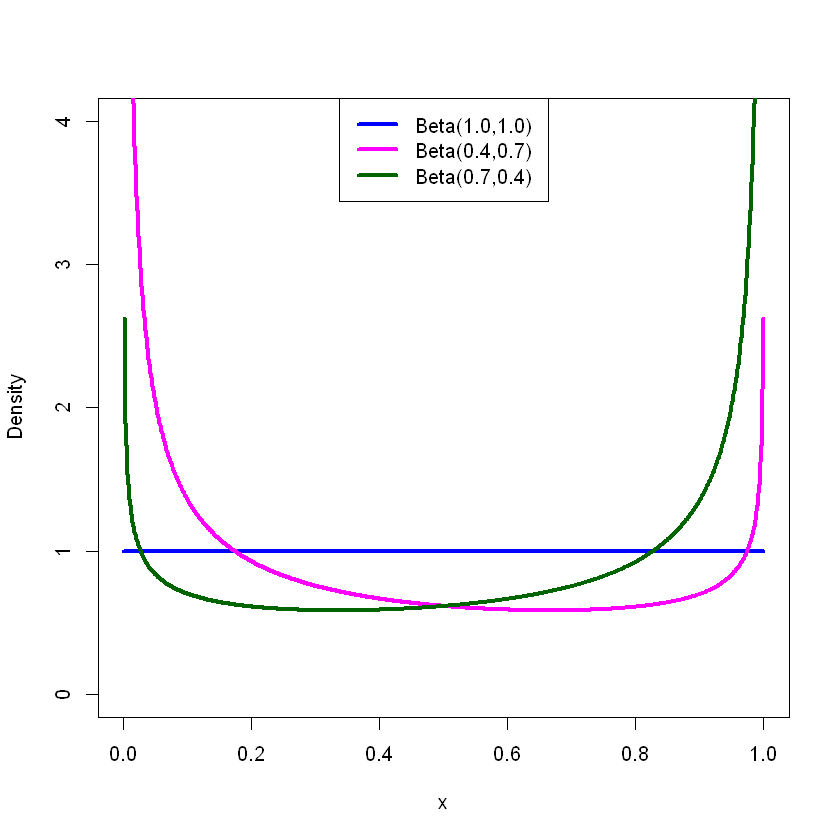

In [6]:
options(repr.plot.width=7,repr.plot.height=7)
x<-seq(0,1,length=1000)         
a1<-1.0
b1<-1.0
a2<-0.4
b2<-0.7
a3<-0.7
b3<-0.4
y1<-dbeta(x,shape1=a1,shape2=b1) # Beta(1,1) is the Unif[0,1] distribution
y2<-dbeta(x,shape1=a2,shape2=b2) 
y3<-dbeta(x,shape1=a3,shape2=b3) 
plot(x,y1,type="l",lwd=3.5,col="blue",ylim=c(0,4),ylab="Density")
lines(x,y2,lwd=3.5,col="magenta")
lines(x,y3,lwd=3.5,col="darkgreen")
legend("top",c(sprintf("Beta(%2.1f,%2.1f)",a1,b1),sprintf("Beta(%2.1f,%2.1f)",a2,b2),
        sprintf("Beta(%2.1f,%2.1f)",a3,b3)),lwd=3.5,col=c("blue","magenta","darkgreen"))

### Beta pdf's with parameters $\geq 1$

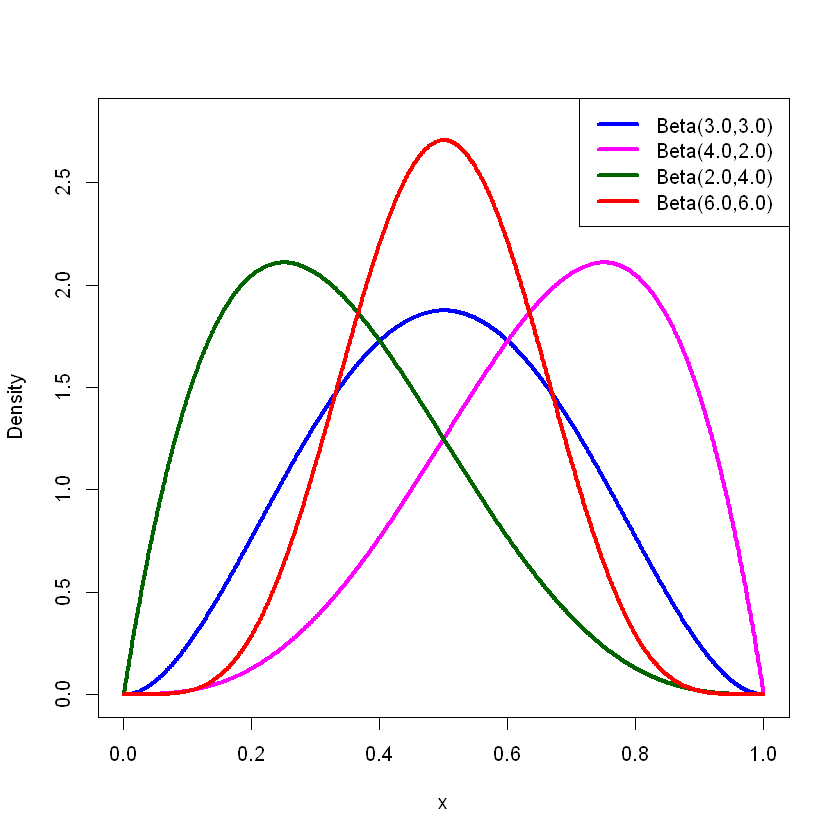

In [7]:
options(repr.plot.width=7,repr.plot.height=7)
x<-seq(0,1,length=1000)
a1<-3.0
b1<-3.0
a2<-4.0
b2<-2.0
a3<-2.0
b3<-4.0
a4<-6.0
b4<-6.0
y4<-dbeta(x,shape1=a1,shape2=b1) # Distributions of the form Beta(a,a) are symmetrical (with respect to x=0.5)
y5<-dbeta(x,shape1=a2,shape2=b2) # Beta(a,b) distributions are unimodal (with one maximum). 
y6<-dbeta(x,shape1=a3,shape2=b3) # 
y7<-dbeta(x,shape1=a4,shape2=b4) 
plot(x,y4,type="l",lwd=3.5,col="blue",ylim=c(0,2.8),ylab="Density")
lines(x,y5,lwd=3.5,col="magenta")
lines(x,y6,lwd=3.5,col="darkgreen")
lines(x,y7,lwd=3.5,col="red")  # peak is higher and sharper for larger parameters
legend("topright",
       c(sprintf("Beta(%2.1f,%2.1f)",3,3),sprintf("Beta(%2.1f,%2.1f)",4,2),
         sprintf("Beta(%2.1f,%2.1f)",2,4),sprintf("Beta(%2.1f,%2.1f)",6,6)),lwd=3.5,
       col=c("blue","magenta","darkgreen","red"))

In [8]:
# A reasonably large number of samples
# The histogram below resembles the theoretical pdf, more closely the larger is n
# [This is a consequence of the LLN. See why?]
n<-10000
# choose any pair of parameters a, b > 0
a<-2
b<-5
x<-rbeta(n,shape1=a,shape2=b)

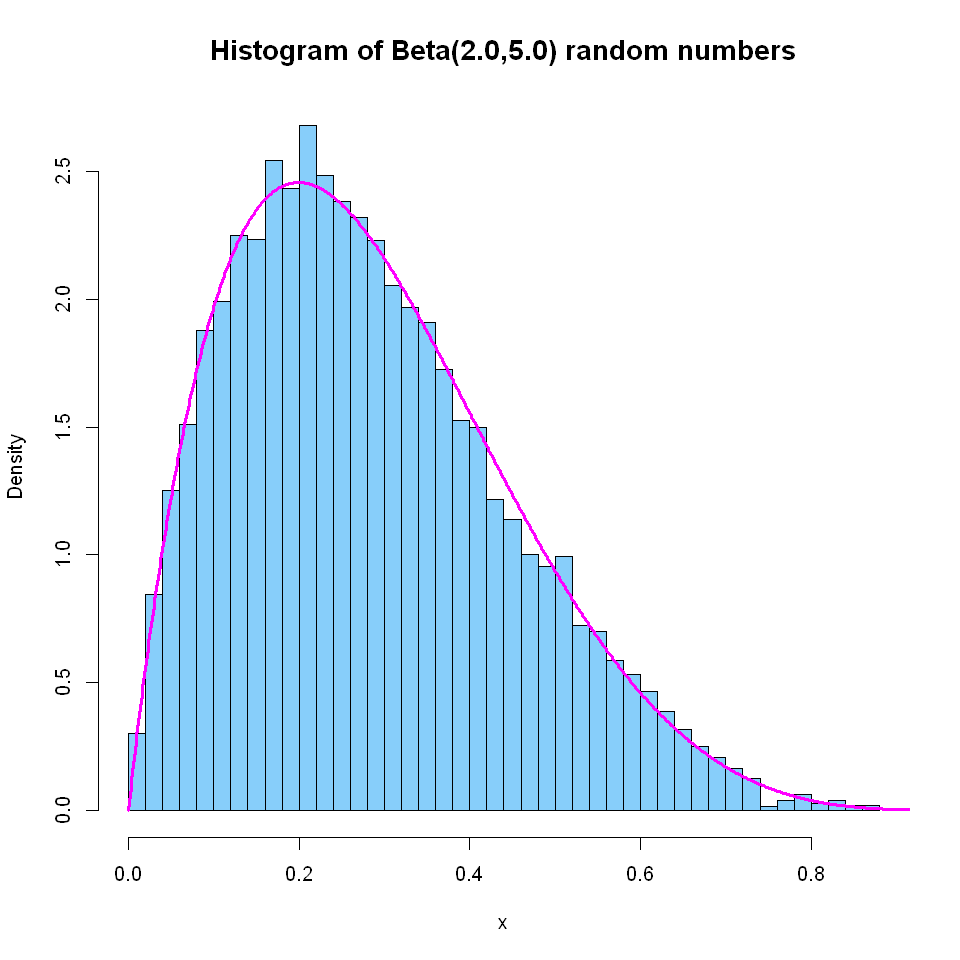

In [9]:
options(repr.plot.width=8,repr.plot.height=8)
hist(x, freq=FALSE,nclass=60,main=sprintf("Histogram of Beta(%2.1f,%2.1f) random numbers",a,b),col="LightSkyBlue",cex.main=1.4 )
u<-seq(0,1,length=1000) 
v<-dbeta(u,shape1=a,shape2=b)
lines(u,v,lwd=2.5,col="magenta") #Compare histogram and theoretical pdf

For a r.v. $X$ following a $\mbox{Beta}(\alpha,\beta)$ distribution (see, e.g., Wikipedia),
\begin{align*}
    \mbox{E}(X)&=\frac{\alpha}{\alpha+\beta},\\
    \mbox{var}(X)&=\frac{\alpha\beta}{(\alpha+\beta)^2\cdot(\alpha+\beta+1)},\\
    \mbox{mode}(X)&=\frac{\alpha-1}{\alpha+\beta-2},\mskip10mu\text{for}\mskip8mu\alpha,\beta>1.
\end{align*}

In [10]:
Beta.quantities<-function (a,b){
    EX<-a/(a+b)
    varX<-a*b/((a+b)^2*(a+b+1))
    modeX<-(a-1)/(a+b-2)
    return(list(EX=EX,varX=varX,modeX=modeX))
    }

For instance, when $\alpha=a$ and $\beta=b$,

In [11]:
Beta.quantities(a,b)

$EX
[1] 0.2857143

$varX
[1] 0.0255102

$modeX
[1] 0.2

which we may compare to the empirical quantities from the random sample

In [12]:
mean(x)
var(x)

[1] 0.2846911

[1] 0.0256594

The empirical mode, that is, the position of the maximum pdf value requires us to evaluate a nonparametric estimation of this pdf.

This is the purpose of the `density()` function. You may think of it as a smoothing of the  histogram.

Here we compare histogram, its smoothing by `density()` and the theoretical pdf

List of 7
 $ x        : num [1:512] -0.0665 -0.0645 -0.0626 -0.0606 -0.0586 ...
 $ y        : num [1:512] 0.000373 0.0005 0.00067 0.00089 0.001172 ...
 $ bw       : num 0.0228
 $ n        : int 10000
 $ call     : language density.default(x = x)
 $ data.name: chr "x"
 $ has.na   : logi FALSE
 - attr(*, "class")= chr "density"


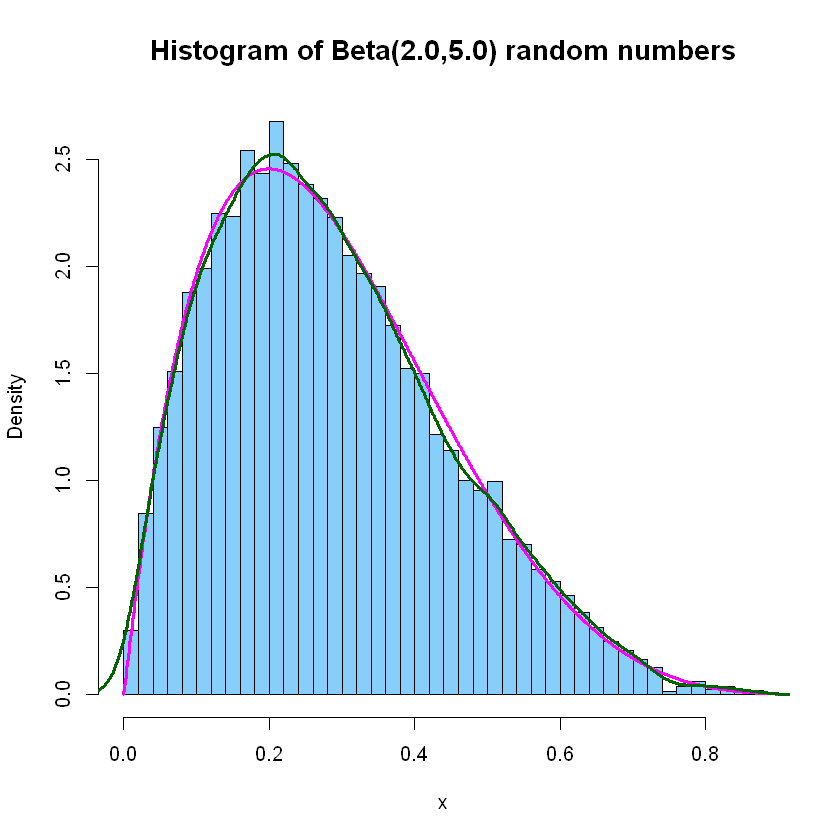

In [13]:
options(repr.plot.width=7,repr.plot.height=7)
hist(x, freq=FALSE,nclass=60,main=sprintf("Histogram of Beta(%2.1f,%2.1f) random numbers",a,b),col="LightSkyBlue",cex.main=1.4 )
lines(u,v,lwd=2.5,col="magenta") #Compare histogram and theoretical pdf
f<-density(x)
str(f)
u<-f$x
v<-dbeta(u,shape1=a,shape2=b)
w<-f$y
lines(u,w,lwd=2.5,col="darkgreen") #Compare histogram and empirical pdf (histogram smoothing)

In [14]:
summary(x)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002031 0.162100 0.262784 0.284691 0.386797 0.876974 

Finally the empirical mode

In [15]:
f<-density(x,bw=0.025) #tuning the bandwidth
f$x[which.max(f$y)]

[1] 0.2058316

# 3. Inverse cdf transformation

The most frequent methods used to generate random numbers following non-uniform distributions, hardwired inside the pre-programmed `r*` `R` functions for well-known distributions, are:

1.  The inverse cdf transformation method (for univariate distributions)

2.  For discrete distributions, random sampling following a given pmf (which may be considered a particular instance
    of the above)

3.  The acceptance-rejection method.

4.  Other transformation-based methods, specific for certain distributions.

In this session we will be working with the first two. Next session will be devoted to the rejection sampling method of generating random numbers, which is important both in itself and as a hint to the all-important MCMC methods.

The inverse cdf transformation method is based on the following property: assume $F:\mathbf{R}\to[0,1]$ is a univariate cdf, that is, a function such that,

-   $F: \mathbf{R}\to[0,1]$ is a non-decreasing, right-continuous function,

-   $F(-\infty)=0$, $F(+\infty)=1$.

Consider the *quantile, or (left-continuous) pseudoinverse* $F^{-}:[0,1]\to \mathbf{R}$ of $F$ (when $F$ is an is an injective function, $F^{-}=F^{-1}$, the ordinary inverse function).

Given a $U\sim\mbox{Unif}[0,1]$, we define the new : 

$$
    X\equiv F^{-}\circ U=F^{-}(U).
$$


It can be proved that $X$ is a r.v.  whose cdf is $F$. This fact is very intuitive when $F$ is a continuous injective function, with inverse function $F^{-1}$. Given any real number $x\in\mathbf{R}$, the value at $x$ of the probability distribution function of $X$ is, by definition:

$$
    P[X\leq x]=P[F^{-1}(U)\leq x]=P[U\leq F(x)]=F(x).
$$

The last equality is due to the fact that the cdf of a $\mbox{Unif}[0,1]$ coincides with the identity function on the interval $(0,1)$. For a proof in the general case, see the Appendix to Chapter 3 in [Fortiana, J.; Nualart, D. (1999) Estadística (in catalan)](http://cataleg.ub.edu/record=b1396567~S1*cat).

If $\mathbf{u}$ is a RSN (Random Sequence of Numbers), distributed as a $\mbox{Unif}[0,1]$, then the sequence $\mathbf{x}$ defined as: 

$$
    x_{t}=F^{-}(u_{t}),\quad t\geq 1,
$$

is a RSN with distribution $F$.

This method has two important limitations:

1.  Valid only for one-dimensional ,

2.  Requires that $F^{-}$ can be computed.


## Exercise 01

Design and write the code for a generator of random numbers for the $\mbox{Exp}(\lambda)$ distribution based on the inverse cdf transformation method.

## Exercise 02

Design, write the code for and test (by comparing its output with that of the pre-programmed `rcauchy()` R function) a generator of random numbers for the $\mbox{Cauchy}(x_{0},\gamma)$ distribution  based on the inverse cdf transformation method. 

## Exercise 03

Design, write the code for and test (by comparing its output with that of the pre-programmed `rlogis()` R function) a generator of random numbers for the $\mbox{Logistic}(\mu,s)$ distribution based on the inverse cdf transformation method. 

## Exercise 04

Design, write the code for a generator of random numbers for the $\mbox{Laplace}(\mu,s)$ distribution based on the inverse cdf transformation method. Compare as above your generator with `rlaplace()` from the `extraDistr` package.

In [ ]:
#install.packages("extraDistr",dependencies=TRUE,repos="https://cloud.r-project.org/")
#require(extraDistr)

## Exercise 05

Design, write the code for a generator of random numbers for the distribution with a triangular pdf described below, based on the inverse cdf transformation method. Assess the quality of your generator by comparing a histogram of generated with the theoretical pdf.

$$
    f(x)=\left\{\begin{array}{lll}
        0,       &\text{ if }    &x\notin[0,1]\\[0.2cm]
        4\,x,    &\text{ if }    &0\leq x<1/2,\\[0.2cm]
        4-4\,x,  &\text{ if }    &1/2\leq x<1,
    \end{array}\right.\mskip50mu x\in\R.
$$

# 4. Discrete distributions

A vector $\mathbf{z}$ of $n$ random numbers following a given discrete distribution, with vector of values $\mathbf{x}=(x_{1},\dots,x_{m})$ and vector of probabilities $\mathbf{d}=(d_{1},\dots,d_{m})$, can be generated from a vector $\mathbf{u}$ of $n$ $\mbox{Unif}(0,1)$-distributed random numbers by relying on the fact that a $\mbox{Unif}(0,1)$ distribution is characterized by the property that the probability of any subsegment of $[0,1]$ is equal to its length.

Thus, if we subdivide the $[0,1]$ segment into $m$ pieces of lengths $(d_{1},\dots,d_{m})$, respectively, each $(0,1)$-uniform random number $u_{i}$ will fall onto a $j$-th piece of length $d_{j}$ with probability equal to $d_{j}$. Then we assign:

$$
    z_{i}=x_{j},\quad\text{  if }\quad u_{i}\quad\text{ falls onto the segment of length }d_{j}.
$$

The following code is an (admittedly suboptimal) implementation of this principle. It is just a literal implementation of the inverse cdf method, with the pseudoinverse $Q=F^{-}$ of the non-injective, discrete step function cdf $F$.

In [16]:
r.disc.rv.1<-function(n,x,d){
    k<-length(d)
    p<-c(0,cumsum(d))
    p0<-p[-(k+1)]
    z<-rep(0,n)
    for (i in 1:n){
        u<-runif(1)
        Ind<-(p0<=u)&(u<p1)
        z[i]=sum(x*Ind)
        }
    return(z)
    }

A much more efficient code,	using the `sample` function in R (see its help page), is as follows:

In [17]:
r.disc.rv<-function(n,x,d){
    z<-sample(x,size=n,replace=TRUE,prob=d)
    return(z)
    }

## Exercise 06

In the Wikipedia article [Letter frequency](https://en.wikipedia.org/wiki/Letter_frequency) you can find a table with the proportion of appearance of each letters in the English language.    
This table is reproduced in the file `Letter.frequency.txt`.
Using `r.disc.rv` compute a sequence of `n=10000` random letters following this distribution.